# Project - Supervised Learning

In [153]:
import numpy as np
import pandas as pd
# importing ploting libraries
import matplotlib.pyplot as plt   
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# To split the data into Train and Test Data
from sklearn.model_selection import train_test_split
# To calculate the accuracy score of the model
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
# To Scale the Data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# To One-Hot Encode the Categorical variables
from sklearn.preprocessing import OneHotEncoder

In [116]:
df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')

In [117]:
#Shape of the Data
df.shape

(5000, 14)

In [118]:
#Information of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [119]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Below are the observations - 
* All the data columns are Numerical. But by business point of view Zip Code should be considered as a categorical variable. 
* Education Level which is coded as 1 to 3 also is a categorical variable in a business point of view.
* There are no missing values. No need to use Imputation of data.
* All the data columns are not in the same scaling. So we need to scale all the numerical columns in the data.

# 1. Data Distributions

**Age Distribution**

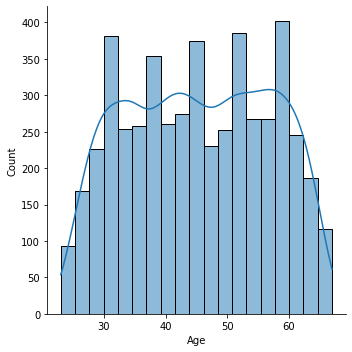

In [56]:
# Let's see the Age distribution of the data
sns.displot(df, x='Age', kde = True)

* The distribution seems uniform.
* The uniform distribution is less likely to have any outliers.

**Experience Distribution**

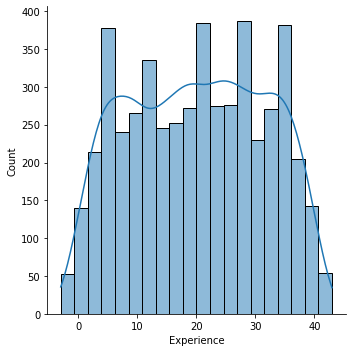

In [57]:
# Let's see the Experience distribution of the data
sns.displot(df, x='Experience', kde = True)

* The data seems to be Uniform Distribution.
* There seems to be data errors where the Experience seems is given as **Negative**. This can create an issue with our modelling as there will not be any negative experience.
* The uniform distribution is less likely to have any outliers. 

**Income Distribution**

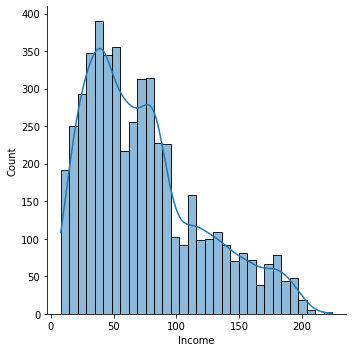

In [58]:
# Let's see the Income distribution of the data
sns.displot(df, x='Income', kde = True)

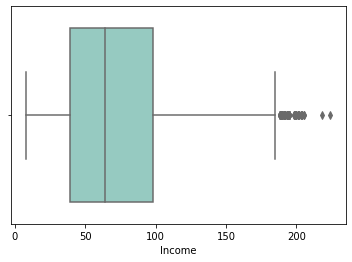

In [59]:
sns.boxplot(df['Income'], palette="Set3")

* The data here is rightly skewed. 
* So during modelling process this might affect our results based on the modelling technique we use. 
* The right skewed distribution tends to have Outliers. Even in our data, we see outliers after around  **Income  180** (from Boxplot)
* So it is better to scale this attribute, so that the outliers affect on the data will be negligable.

**ZIP Code Distribution**

In [120]:
df['ZIP Code'].nunique()

467

In [121]:
# Let's see the Unique Zip Code count of records in the data
df['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

* ZIP Code even though it is a numerical number, by business sense it is a categorical variable. Two numerical codes cannot be compared in relative terms as how we compare the two different Ages, or incomes.
* Zip Codes have 467 unique values. So using this in the modelling makes sense ? or do we need to do some feature engineering to reduce the number of levels of the zip code.

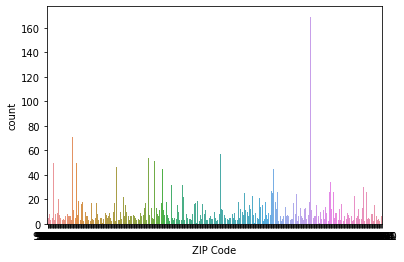

In [122]:
sns.countplot(df['ZIP Code'])

* it is very difficult to understand the distribution of the Zip code attribute visually. 
* In turn we will try to do feature engineering and create new feature where we can understand the distribution.
* Usually the closer ZIP code numbers will have closer distance geograpically.
* Let's extract the first 2 characters (Assumption that all the zip codes with same first 2 chararacters are from the nearby Geographical Location) 

In [123]:
df['zip_code_2'] = df['ZIP Code'].astype(str).str[:2].astype(int)

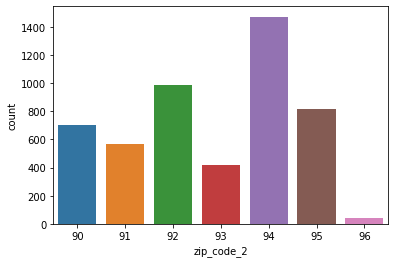

In [124]:
sns.countplot(df['zip_code_2'])

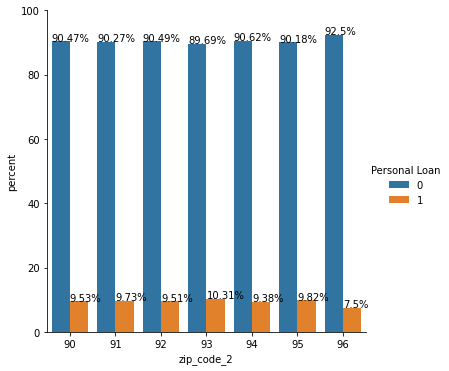

In [88]:
x,y = 'zip_code_2', 'Personal Loan'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* There is no clear variation of Acceptance rate % between the different zip codes.

**Family Distribution**

In [66]:
# Lets understand the levels of the Family Attribute
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

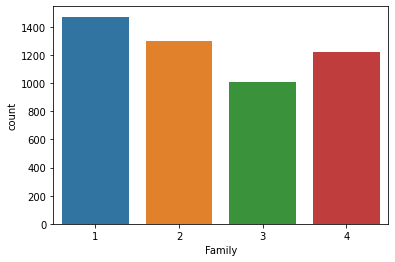

In [67]:
sns.countplot(df['Family'])

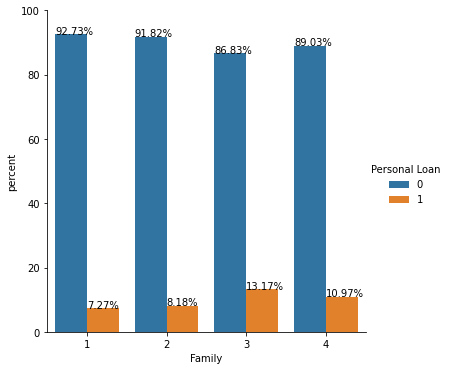

In [87]:
x,y = 'Family', 'Personal Loan'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* There is clear difference between the Personal Loan acceptance rate between Family of size 1&2 and Family of size 3&4.
* Family of Size more than 3 & 4 tends to have more Loan Converstion rate.

**CCAvg Distribution**

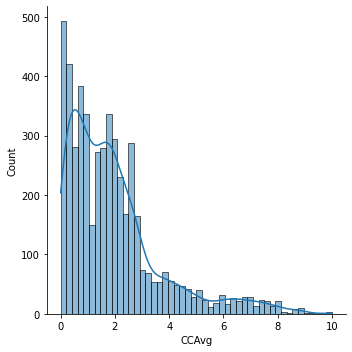

In [30]:
sns.displot(df, x = 'CCAvg', kde = True)

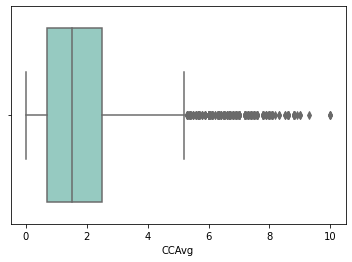

In [32]:
sns.boxplot(df['CCAvg'], palette="Set3")

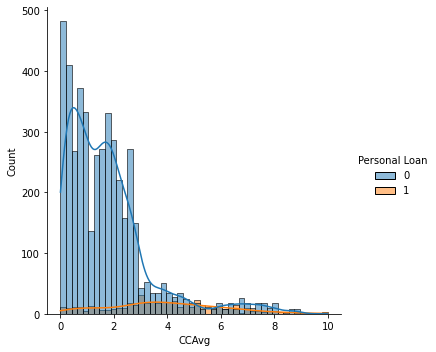

In [108]:
sns.displot(df, x = 'CCAvg', kde = True, hue = "Personal Loan")

* The data here is rightly skewed.
* The right skewed distribution tends to have Outliers. Even in our data, we see outliers after around CCAvg 5 (from Boxplot)
* So it is better to scale this attribute, so that the outliers affect on the data will be negligable.
* Customers with High CCAvg tends to take the Personal Loan (using Bivariate)

**Education Distribution**

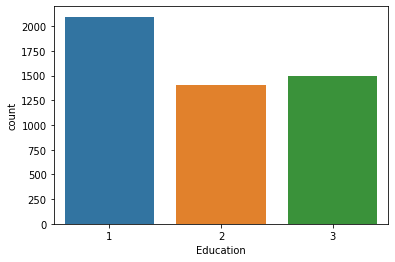

In [34]:
sns.countplot(df['Education'])

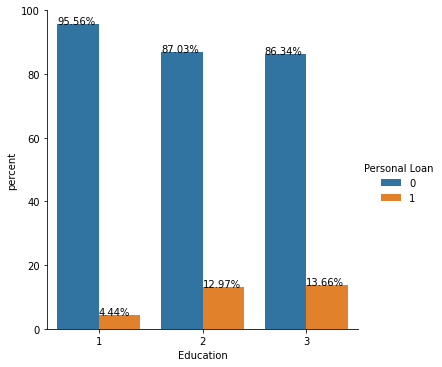

In [86]:
x,y = 'Education', 'Personal Loan'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* There is a clear trend that the Person with higher education (3) tends to accept the Loand more than with Education Level (2) than with Education Level (1). Clear variation is seen between Education Level 1 and Level 2&3.

**Mortgage Distribution**

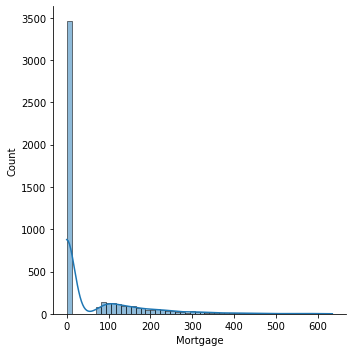

In [38]:
sns.displot(df['Mortgage'], kde = True)

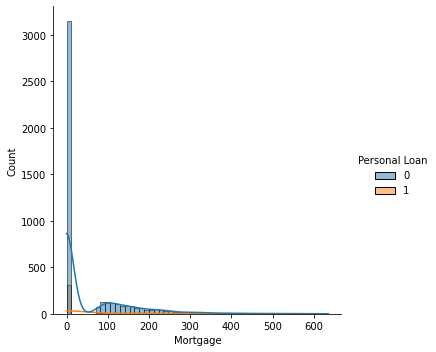

In [44]:
sns.displot(df, x = 'Mortgage', hue = 'Personal Loan', kde = True)

* The data seems to be highly skewed.
* This attribute needs to be scaled
* It is clearly seen from this bivariate plot that the chance of Personal Loan acceptance is high for the customers with 0 existing Mortgage.

**Securities Account Distribution**

In [45]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

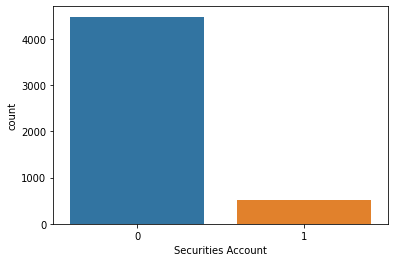

In [46]:
sns.countplot(df['Securities Account'])

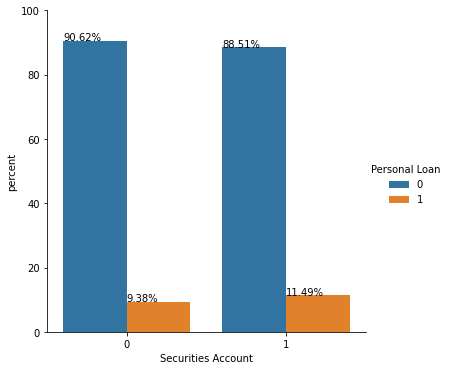

In [85]:
x,y = 'Securities Account', 'Personal Loan'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* There is a slight increase in the Loan % rate with the customer having Security Account

**CD Account Distribution**

In [68]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

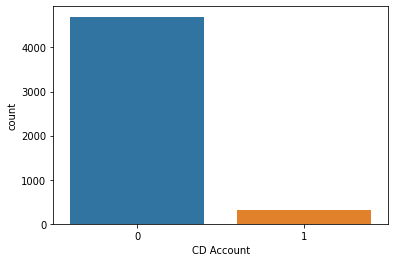

In [69]:
sns.countplot(df['CD Account'])

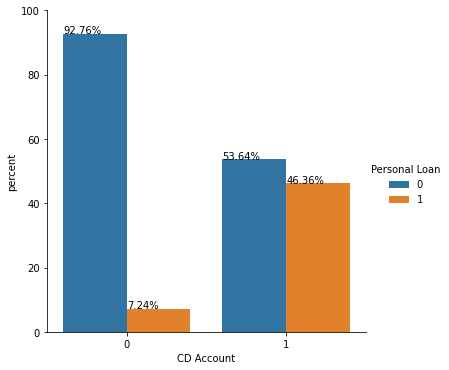

In [84]:
x,y = 'CD Account', 'Personal Loan'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* There are very few customers with COD with Bank.
* it is clearly seen that the customers with COD with bank has high chance of taking the Personal Loan.

**Online Distribution**

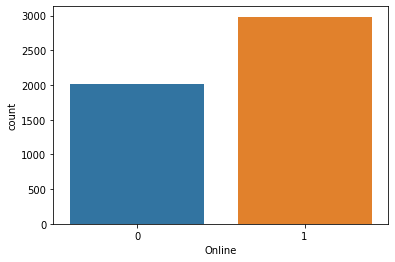

In [71]:
sns.countplot(df['Online'])

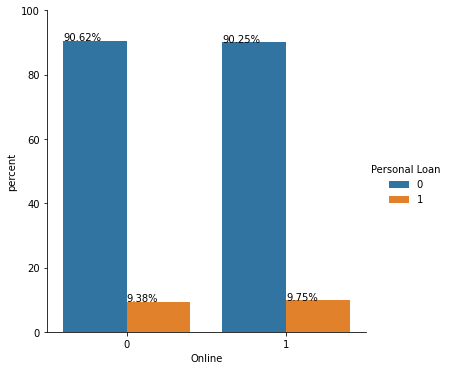

In [83]:
x,y = 'Online', 'Personal Loan'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* There is no clear difference in the acceptance rates based whether the customer does Online banking.

**Credit Card Distribution**

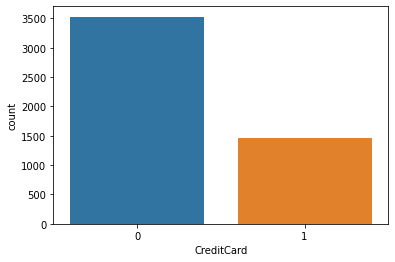

In [93]:
sns.countplot(df['CreditCard'])

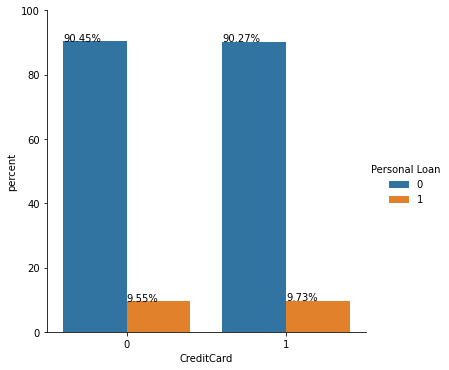

In [94]:
x,y = 'CreditCard', 'Personal Loan'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

* Based on the distribution, there is no clear difference in the acceptance rate based on whether the customer uses the Banks CreditCard. So this attribute may not contribute much to the modelling

# 2. Target Column Distribution

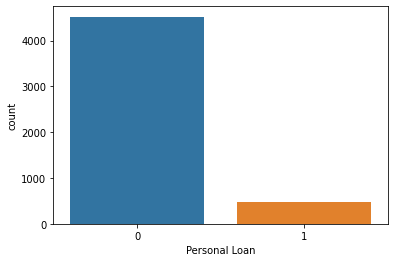

In [96]:
sns.countplot(df['Personal Loan'])

* The data is highly Imbalanced as majority of Personal Loan are not accepted in the Campaign.
* This will affect the modelling output, but can be avoided using various techniques like - Upsampling, downsampling, Stratified Sampling.

**Modelling Process -** Before the modelling process, we will do all the feature scaling and feature engineering and some more EDA

**Correlation**

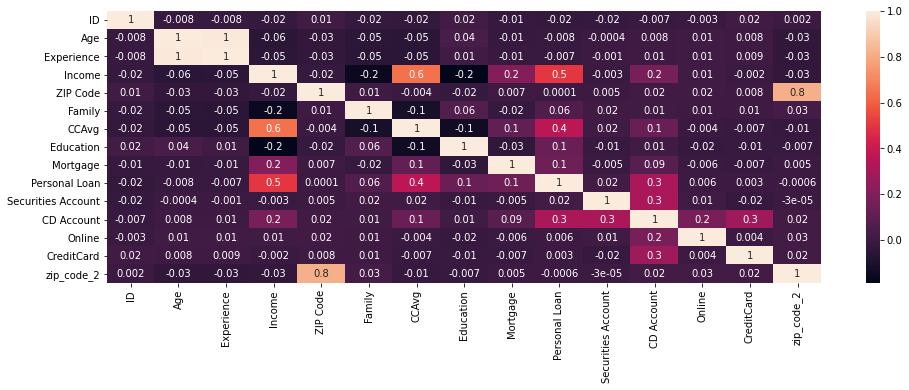

In [107]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr('pearson'), annot = True, fmt = '.1g')

* There is strong correlation between Income Vs Personal Loan. This is because customers with higher income will tend to take the Loan.
* There is a strong correlation between CCAvg Vs Personal Loan. This is because customers with higher Spending tends to take Personal Loan. ALso this might be indirect relation as customer with higher Income has higher CCAvg (spending capacity) and they tend to take the Personal Loan
* Customers with CD account takes personal loan and the clear correlation is seen here.

# 3. Split the Data into Train and Test

Before splitting the data into Train and Test datasets, we will finish our Feature Engineering by doing the Label Encoding and Scaling.

In [125]:
zip = pd.get_dummies(df.zip_code_2, prefix='zip_code')
df = df.drop(['zip_code_2'], axis = 1)
df = pd.concat([df, zip], axis = 1)

In [126]:
df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,zip_code_90,zip_code_91,zip_code_92,zip_code_93,zip_code_94,zip_code_95,zip_code_96
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [129]:
x = df.drop(['ID', 'ZIP Code', 'Personal Loan'], axis = 1)

In [157]:
# Standard Scaling all the columns
X_std = pd.DataFrame(StandardScaler().fit_transform(x))
X_std.columns = x.columns

In [158]:
y =df['Personal Loan']

In [159]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

**Splitting the Data**

In [160]:
x_train, x_test, y_train, y_test = train_test_split(X_std, y, random_state = 42, stratify = y, test_size = 0.3)

In [161]:
print(df.shape)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5000, 21)
(3500, 18) (1500, 18) (3500,) (1500,)


In [162]:
# Understanding the distribution of both Y_trian and Y_test is same ?
print(df['Personal Loan'].sum()/len(df['Personal Loan']), y_train.sum()/len(y_train), y_test.sum()/len(y_test))

0.096 0.096 0.096


The data distribution is same for both before split and after Split data

# 5. Modelling

**Logistic Regression**

In [163]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [164]:
# Fit the Logistic Regression Model on data
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
# Predict price range of test data
y_pred = model.predict(x_test)

In [166]:
# Let's measure the accuracy of this model's prediction
accuracy_score(y_test, y_pred)

0.952

In [167]:
# And some other metrics 
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.82      0.65      0.72       144

    accuracy                           0.95      1500
   macro avg       0.89      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



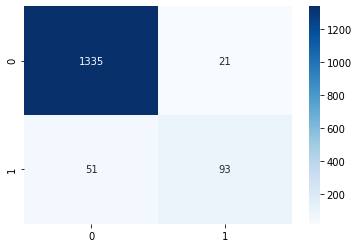

In [168]:
conf_mat = confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (6,4))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

**KNN**

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:

# instantiate learning model (k = 3)
knn3 = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn3.fit(x_train, y_train)

# predict the response
y_pred = knn3.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn5 = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn5.fit(x_train, y_train)

# predict the response
y_pred = knn5.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn7 = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn7.fit(x_train, y_train)

# predict the response
y_pred = knn7.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.9446666666666667
0.9386666666666666
0.9373333333333334


* K - 3 has the better accuracy compared to other parameters.
* we will directly take the Confusion Matrix of the K = 3 as it is the best Hyperparameter for KNN

In [182]:
y_pred = knn3.predict(x_test)
accuracy_score(y_test, y_pred)

0.9446666666666667

In [183]:
# And some other metrics 
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.85      0.51      0.64       144

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.81      1500
weighted avg       0.94      0.94      0.94      1500



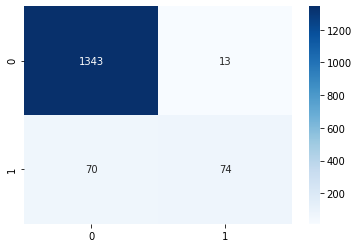

In [184]:
conf_mat = confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (6,4))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

**Naive Bayes Model**

In [176]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
# create the model
nb_model = GaussianNB()

nb_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [188]:
y_pred = nb_model.predict(x_test)

In [189]:
# Let's measure the accuracy of this model's prediction
accuracy_score(y_test, y_pred)

0.8786666666666667

In [190]:
# And some other metrics 
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1356
           1       0.41      0.57      0.47       144

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.89      1500



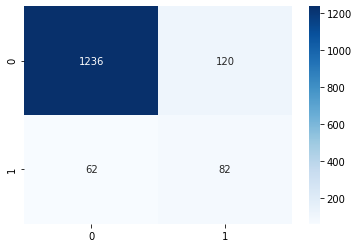

In [191]:
conf_mat = confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (6,4))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

## Conclusions

* Out of Logistic, KNN and Naive Bayes => Logistic Regression and KNN performs better compared to Naive Bayes.
* Naive Bayes usually performs bad on Numerical attributes. Out attributes mostly have all Numerical Attributes. Because of this Naive Bayes is not able to perform well. Also the f1-Score is very low for Naive Bayes compared to other.
* Logistic seems to fit well compared to all other as it is able to predict '1' Truth Value better compared to other models. This is the reason for high f1-score